In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 

Importing the main dataframe

In [2]:
df = pd.read_csv("data/mental-illnesses-prevalence.csv",  encoding="utf-8") 

In [ ]:
df.info() 

importing working hours informtion

In [6]:
try:
    working_hours = pd.read_excel("/Users/jamie/neuefische/MindScape/data/pwt1001.xlsx", sheet_name="Data")
    print(working_hours.info())
except Exception as e:
    print(f"An error occurred: {e}") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12810 non-null  object 
 1   country        12810 non-null  object 
 2   currency_unit  12810 non-null  object 
 3   year           12810 non-null  int64  
 4   rgdpe          10399 non-null  float64
 5   rgdpo          10399 non-null  float64
 6   pop            10399 non-null  float64
 7   emp            9529 non-null   float64
 8   avh            3492 non-null   float64
 9   hc             8637 non-null   float64
 10  ccon           10399 non-null  float64
 11  cda            10399 non-null  float64
 12  cgdpe          10399 non-null  float64
 13  cgdpo          10395 non-null  float64
 14  cn             10314 non-null  float64
 15  ck             7090 non-null   float64
 16  ctfp           6407 non-null   float64
 17  cwtfp          6407 non-null   float64
 18  rgdpna

Clean the data

In [8]:
working_hours = working_hours.dropna(subset=['avh'])
working_hours = working_hours[['country', 'year', 'avh']] 
working_hours 

,country,year,avh
350,Argentina,1950,2034.000000
351,Argentina,1951,2037.866753
352,Argentina,1952,2041.740856
353,Argentina,1953,2045.622325
354,Argentina,1954,2049.511172
...,...,...,...
12664,South Africa,2014,2209.091467
12666,South Africa,2016,2218.455068
12667,South Africa,2017,2197.033263
12668,South Africa,2018,2191.363362


In [9]:
print(len(working_hours['country'].unique())) 

69


In [ ]:
working_hours.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3492 entries, 350 to 12669
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3492 non-null   object 
 1   year     3492 non-null   int64  
 2   avh      3492 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 109.1+ KB


In [11]:
df.rename(columns={'Entity': 'country', 'Year': 'year', 'Code': 'code', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'pct_schizophrenia', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'pct_depression', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'pct_anxiety', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'pct_bipolar', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'pct_eating_disorder' }, inplace=True) 

Merge Datasets

In [12]:
df_combined = pd.merge(df, working_hours, on=['country', 'year'], how='left')

In [13]:
df_combined.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              6420 non-null   object 
 1   code                 6150 non-null   object 
 2   year                 6420 non-null   int64  
 3   pct_schizophrenia    6420 non-null   float64
 4   pct_depression       6420 non-null   float64
 5   pct_anxiety          6420 non-null   float64
 6   pct_bipolar          6420 non-null   float64
 7   pct_eating_disorder  6420 non-null   float64
 8   avh                  1785 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 451.5+ KB


Add information about population

In [14]:
population = pd.read_csv('/Users/jamie/neuefische/MindScape/data/API_SP.POP.TOTL_DS2_en_csv_v2_85.csv', delimiter=',', encoding='utf-8', on_bad_lines='skip', header=2) 

In [15]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [16]:
pop_long = pd.melt(population, 
                  id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='year', 
                  value_name='value') 

In [18]:
pop_long.dropna(subset=['value'], inplace = True) 

Prepare for merging

In [19]:
pop_long.rename(columns= {'Country Name': 'country', 'Country Code': 'code'}, inplace = True) 

In [21]:
pop_long['year'] = pop_long['year'].astype(int) 

In [22]:
# Set the display option to show numbers in their full form because the population was shown in scientific notation 
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

df_master = pd.merge(df_combined, pop_long, on=['code', 'year'], how='left')

# Reset display option to its default after the merge
pd.reset_option('display.float_format')


Clean merged dataframe

In [23]:
df_master.rename(columns={'country_x': 'country', 'value': 'population'}, inplace = True)

In [24]:
df_master.drop(columns=['Indicator Name', 'country_y', 'Indicator Code'], inplace=True)

In [25]:
df_master.head()

,country,code,year,pct_schizophrenia,pct_depression,pct_anxiety,pct_bipolar,pct_eating_disorder,avh,population
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,NaN,10694796.0
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,NaN,10745167.0
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,NaN,12057433.0
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,NaN,14003760.0
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,NaN,15455555.0


Extract Regions from main Dataset

In [26]:
regions = df_master[df_master['code'].isnull()]
regions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 30 to 6149
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              270 non-null    object 
 1   code                 0 non-null      object 
 2   year                 270 non-null    int64  
 3   pct_schizophrenia    270 non-null    float64
 4   pct_depression       270 non-null    float64
 5   pct_anxiety          270 non-null    float64
 6   pct_bipolar          270 non-null    float64
 7   pct_eating_disorder  270 non-null    float64
 8   avh                  0 non-null      float64
 9   population           0 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.2+ KB


In [27]:
regions.drop(columns = ['avh', 'population', 'code']) 

,country,year,pct_schizophrenia,pct_depression,pct_anxiety,pct_bipolar,pct_eating_disorder
30,Africa (IHME GBD),1990,0.219527,4.602806,3.696839,0.607027,0.111027
31,Africa (IHME GBD),1991,0.219559,4.598041,3.695416,0.607090,0.110425
32,Africa (IHME GBD),1992,0.219579,4.593013,3.693819,0.607127,0.109845
33,Africa (IHME GBD),1993,0.219583,4.588568,3.692097,0.607134,0.109305
34,Africa (IHME GBD),1994,0.219556,4.586263,3.690115,0.607082,0.108813
...,...,...,...,...,...,...,...
6145,Upper-middle-income countries,2015,0.290310,3.133155,3.852064,0.447027,0.154607
6146,Upper-middle-income countries,2016,0.292403,3.134309,3.893753,0.449159,0.158290
6147,Upper-middle-income countries,2017,0.294482,3.134088,3.937173,0.451180,0.161369
6148,Upper-middle-income countries,2018,0.294354,3.132297,3.943191,0.453208,0.163252


In [29]:
df_master.dropna(subset='code', inplace = True)

In [3]:
from sql_functions import get_engine, get_sql_config, get_api, get_dataframe, push_to_sql
sql_config = get_sql_config() 

In [34]:
schema = 'cgn_analytics_24_1'
engine = get_engine()
table_name = 'mindscape_mhealth_vs_whours'

# push_to_sql(df_master, table_name, engine, schema)

In [35]:
sql_query = f'select * from {schema}.mindscape_mhealth_vs_whours;' 
mindscape_mhealth_vs_whours = get_dataframe(sql_query) 

In [36]:
sql_query = f'select * from {schema}.mindscape_cl_score;' 
mindscape_cl_score = get_dataframe(sql_query) 

In [37]:
mindscape_cl_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1068 non-null   object 
 1   code                  1068 non-null   object 
 2   year                  1068 non-null   int64  
 3   pct_depression        1068 non-null   float64
 4   pct_anxiety           1068 non-null   float64
 5   pct_eating_disorder   1068 non-null   float64
 6   cantril_ladder_score  1068 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 58.5+ KB


In [38]:
drugs = pd.read_csv('data/number-with-drug-disorders-by-substance.csv', encoding = 'utf-8') 
drugs.head() 

,Entity,Code,Year,"Current number of cases of other drug use disorders, in both sexes aged all ages","Current number of cases of amphetamine use disorders, in both sexes aged all ages","Current number of cases of cocaine use disorders, in both sexes aged all ages","Current number of cases of cannabis use disorders, in both sexes aged all ages","Current number of cases of opioid use disorders, in both sexes aged all ages"
0,Afghanistan,AFG,1990,1012.1779,3361.0144,1437.8527,14507.927,23464.540
1,Afghanistan,AFG,1991,1072.9874,4055.5364,1654.2284,16773.160,26072.688
2,Afghanistan,AFG,1992,1189.7113,5250.9756,2015.0161,20474.190,30662.150
3,Afghanistan,AFG,1993,1278.9402,6166.2607,2266.7605,22860.400,33832.223
4,Afghanistan,AFG,1994,1325.2874,6583.5870,2360.2273,23491.316,35019.977


In [39]:
df_master = pd.merge(mindscape_mhealth_vs_whours, mindscape_cl_score, on=['code', 'year'], how='left')

In [40]:
df_master.drop(columns = ['country_y', 'pct_depression_y', 'pct_anxiety_y', 'pct_eating_disorder_y']) 

,country_x,code,year,pct_schizophrenia,pct_depression_x,pct_anxiety_x,pct_bipolar,pct_eating_disorder_x,avh,population,cantril_ladder_score
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,NaN,10694796.0,NaN
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,NaN,10745167.0,NaN
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,NaN,12057433.0,NaN
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,NaN,14003760.0,NaN
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,NaN,15455555.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6145,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652,NaN,14154937.0,4.1930
6146,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662,NaN,14452704.0,3.8750
6147,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330,NaN,14751101.0,3.6923
6148,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909,NaN,15052184.0,3.6632


In [41]:
drugs.columns  = drugs.columns.str.lower()

In [42]:
df_master = pd.merge(df_master, drugs, on=['code', 'year'], how='left') 

In [43]:
df_master.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country_x                                                                          6150 non-null   object 
 1   code                                                                               6150 non-null   object 
 2   year                                                                               6150 non-null   int64  
 3   pct_schizophrenia                                                                  6150 non-null   float64
 4   pct_depression_x                                                                   6150 non-null   float64
 5   pct_anxiety_x                                                                      6150 non-null   float

In [44]:
df_master.rename(columns={'country_x': 'country',
                            'pct_depression_x': 'pct_depression', 
                            'pct_anxiety_x': 'pct_anxiety',
                            'pct_eating_disorder_x': 'pct_eating_disorder',
                            'avh': 'avg_working_hours', 
                            'current number of cases of other drug use disorders, in both sexes aged all ages':'drug_use_disorder',
                            'current number of cases of amphetamine use disorders, in both sexes aged all ages':'amphetamine_use_disorder', 
                            'current number of cases of cocaine use disorders, in both sexes aged all ages':'cocaine_use_disorder',
                            'current number of cases of cannabis use disorders, in both sexes aged all ages': 'cannabis_use_disorder',
                            'current number of cases of opioid use disorders, in both sexes aged all ages' : 'opioid_use_disorder'}, 
                            inplace=True) 

In [45]:
df_master.drop(columns=['country_y', 'pct_depression_y', 'pct_anxiety_y', 'pct_eating_disorder_y', 'entity'], inplace = True)

In [46]:
alcohol = pd.read_csv('data/share-with-alcohol-use-disorders.csv', encoding = 'utf-8') 
alcohol.head() 

,Entity,Code,Year,"Current number of cases of alcohol use disorders per 100 people, in both sexes aged age-standardized"
0,Afghanistan,AFG,1990,0.432842
1,Afghanistan,AFG,1991,0.433216
2,Afghanistan,AFG,1992,0.434574
3,Afghanistan,AFG,1993,0.435168
4,Afghanistan,AFG,1994,0.435141


In [47]:
alcohol.columns = alcohol.columns.str.lower() 

In [48]:
df_master = pd.merge(df_master, alcohol, on=['code', 'year'], how='left')  

In [49]:
df_master.rename(columns={'current number of cases of alcohol use disorders per 100 people, in both sexes aged age-standardized': 'alcohol_use_disorder'}, inplace = True)

In [50]:
df_master.drop(columns='entity', inplace = True)

In [51]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   6150 non-null   object 
 1   code                      6150 non-null   object 
 2   year                      6150 non-null   int64  
 3   pct_schizophrenia         6150 non-null   float64
 4   pct_depression            6150 non-null   float64
 5   pct_anxiety               6150 non-null   float64
 6   pct_bipolar               6150 non-null   float64
 7   pct_eating_disorder       6150 non-null   float64
 8   avg_working_hours         1785 non-null   float64
 9   population                6000 non-null   float64
 10  cantril_ladder_score      1068 non-null   float64
 11  drug_use_disorder         6150 non-null   float64
 12  amphetamine_use_disorder  6150 non-null   float64
 13  cocaine_use_disorder      6150 non-null   float64
 14  cannabis

In [52]:
# Define the desired order of columns
desired_columns_order = [
    'country', 'code', 'year', 'population', 'pct_depression', 
    'pct_anxiety', 'pct_eating_disorder', 'pct_bipolar', 'pct_schizophrenia', 'alcohol_use_disorder', 
    'drug_use_disorder', 'amphetamine_use_disorder', 'cocaine_use_disorder', 
    'cannabis_use_disorder', 'opioid_use_disorder', 'avg_working_hours', 
    'cantril_ladder_score']

# Rearrange the columns in df_master
df_master = df_master[desired_columns_order]


In [53]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   6150 non-null   object 
 1   code                      6150 non-null   object 
 2   year                      6150 non-null   int64  
 3   population                6000 non-null   float64
 4   pct_depression            6150 non-null   float64
 5   pct_anxiety               6150 non-null   float64
 6   pct_eating_disorder       6150 non-null   float64
 7   pct_bipolar               6150 non-null   float64
 8   pct_schizophrenia         6150 non-null   float64
 9   alcohol_use_disorder      6150 non-null   float64
 10  drug_use_disorder         6150 non-null   float64
 11  amphetamine_use_disorder  6150 non-null   float64
 12  cocaine_use_disorder      6150 non-null   float64
 13  cannabis_use_disorder     6150 non-null   float64
 14  opioid_u

In [54]:
# Reset float formatting to default
pd.reset_option('display.float_format')

In [55]:
df_master.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   6150 non-null   object 
 1   code                      6150 non-null   object 
 2   year                      6150 non-null   int64  
 3   population                6000 non-null   float64
 4   pct_depression            6150 non-null   float64
 5   pct_anxiety               6150 non-null   float64
 6   pct_eating_disorder       6150 non-null   float64
 7   pct_bipolar               6150 non-null   float64
 8   pct_schizophrenia         6150 non-null   float64
 9   alcohol_use_disorder      6150 non-null   float64
 10  drug_use_disorder         6150 non-null   float64
 11  amphetamine_use_disorder  6150 non-null   float64
 12  cocaine_use_disorder      6150 non-null   float64
 13  cannabis_use_disorder     6150 non-null   float64
 14  opioid_u

In [ ]:
# schema = 'cgn_analytics_24_1'
# engine = get_engine()
# table_name = 'mindscape_df_master'

# push_to_sql(df_master, table_name, engine, schema)

'The mindscape_df_master table was imported successfully.'

In [56]:
df_master['alcohol_use_disorder'] = df_master['alcohol_use_disorder'] * df_master['population'] // 100

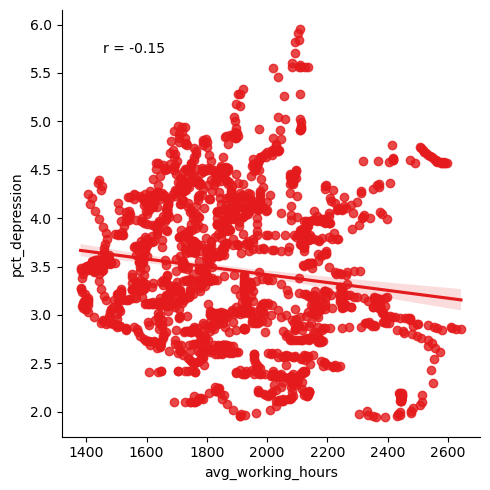

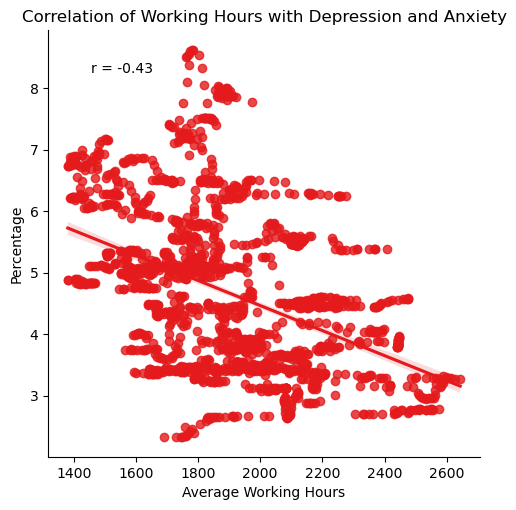

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where avg_working_hours is not null
df_filtered = df_master.dropna(subset=['avg_working_hours'])

# Define a non-blue color palette
palette = sns.color_palette("Set1")

# Set the color palette and create lmplot
sns.set_palette(palette)

# Function to calculate and annotate correlation coefficient
def annotate_r(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)

# Plotting lmplot with annotations
g = sns.lmplot(x='avg_working_hours', y='pct_depression', data=df_filtered)
g.map(annotate_r, 'avg_working_hours', 'pct_depression')

g = sns.lmplot(x='avg_working_hours', y='pct_anxiety', data=df_filtered)
g.map(annotate_r, 'avg_working_hours', 'pct_anxiety')

# Set plot labels and title
plt.xlabel('Average Working Hours')
plt.ylabel('Percentage')
plt.title('Correlation of Working Hours with Depression and Anxiety')

# Show the plot
plt.show()


In [4]:
schema = 'cgn_analytics_24_1'
engine = get_engine()
sql_config = get_sql_config() 

sql_query = f'select * FROM {schema}.mindscape_df_master;' 
mindscape_df = get_dataframe(sql_query) 

In [6]:
mindscape_df.columns

Index(['country', 'code', 'year', 'population', 'pct_depression',
       'pct_anxiety', 'pct_eating_disorder', 'pct_bipolar',
       'pct_schizophrenia', 'alcohol_use_disorder', 'drug_use_disorder',
       'amphetamine_use_disorder', 'cocaine_use_disorder',
       'cannabis_use_disorder', 'opioid_use_disorder', 'avg_working_hours',
       'cantril_ladder_score'],
      dtype='object')

In [60]:
mindscape_df_filtered = mindscape_df[mindscape_df['year'] == 2019]
mindscape_df_sort = mindscape_df_filtered.sort_values(by='avg_working_hours', ascending=False)

In [ ]:
mindscape_df_sort.head()

,country,code,year,population,pct_depression,pct_anxiety,pct_eating_disorder,pct_bipolar,pct_schizophrenia,alcohol_use_disorder,drug_use_disorder,amphetamine_use_disorder,cocaine_use_disorder,cannabis_use_disorder,opioid_use_disorder,avg_working_hours,cantril_ladder_score
929,Cambodia,KHM,2019,16207746.0,2.950099,4.579762,0.083947,0.317939,0.273498,0.766170,1946.3011,25626.4180,703.4326,39378.176,13142.311,2474.911893,4.8484
3691,Myanmar,MMR,2019,53040212.0,2.193303,3.977017,0.095674,0.316710,0.278201,0.776520,7240.9640,65946.5900,2249.5745,184806.170,42287.710,2447.057659,4.3080
449,Bangladesh,BGD,2019,165516222.0,4.619810,3.180923,0.115300,0.389303,0.276187,1.127282,31843.0550,20793.0370,6257.4660,304793.560,275391.340,2418.882693,4.8328
4919,Singapore,SGP,2019,5703569.0,2.008132,2.708086,0.453674,0.719749,0.319195,0.644918,1992.6813,6285.7705,8422.3250,23844.777,4177.833,2330.165875,6.3771
3241,Malaysia,MYS,2019,32804020.0,3.663095,4.599253,0.150475,0.339392,0.316804,0.516775,5607.9023,49859.9000,1395.6599,76297.266,76531.970,2197.058086,5.3843


In [61]:
mindscape_df_sort = mindscape_df_filtered.sort_values(by='pct_depression', ascending=False)

/var/folders/hk/y05z0d6n6_bd590qwk2dcx8m0000gn/T/ipykernel_3261/19505873.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Disorder', y='Percentage', hue='country', data=df_plot_melted, ci=None)


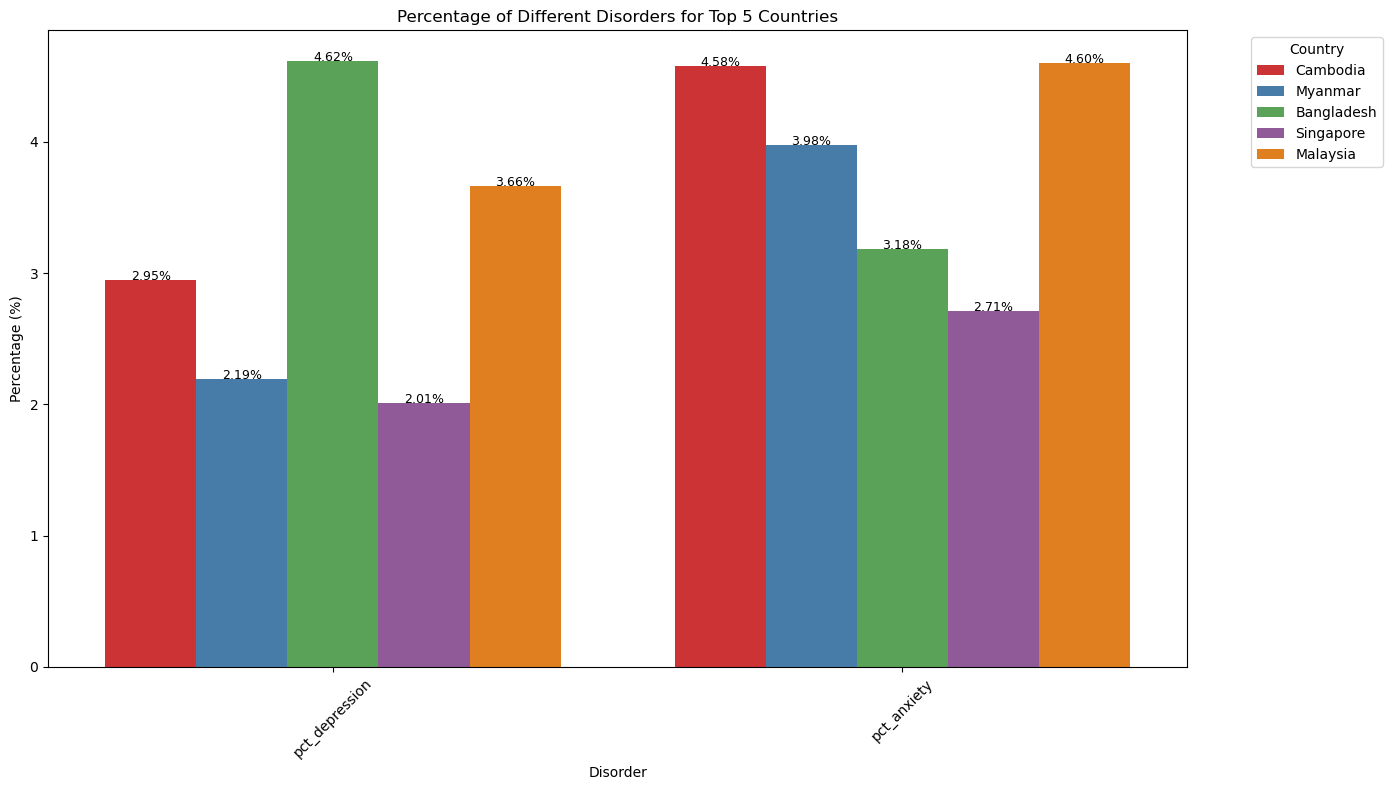

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the dataframe by 'avg_working_hours' and take the top 5 countries
df_top5 = mindscape_df_filtered.sort_values(by='avg_working_hours', ascending=False).head()

# Selecting relevant columns for plotting
df_plot = df_top5[['country', 'avg_working_hours', 'pct_depression', 'pct_anxiety']] 

# Melt the dataframe to reshape it for plotting
df_plot_melted = pd.melt(df_plot, id_vars=['country', 'avg_working_hours'], 
                         var_name='Disorder', value_name='Percentage')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plotting
ax = sns.barplot(x='Disorder', y='Percentage', hue='country', data=df_plot_melted, ci=None)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=9)

# Setting labels and title
plt.title('Percentage of Different Disorders for Top 5 Countries')
plt.xlabel('Disorder')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


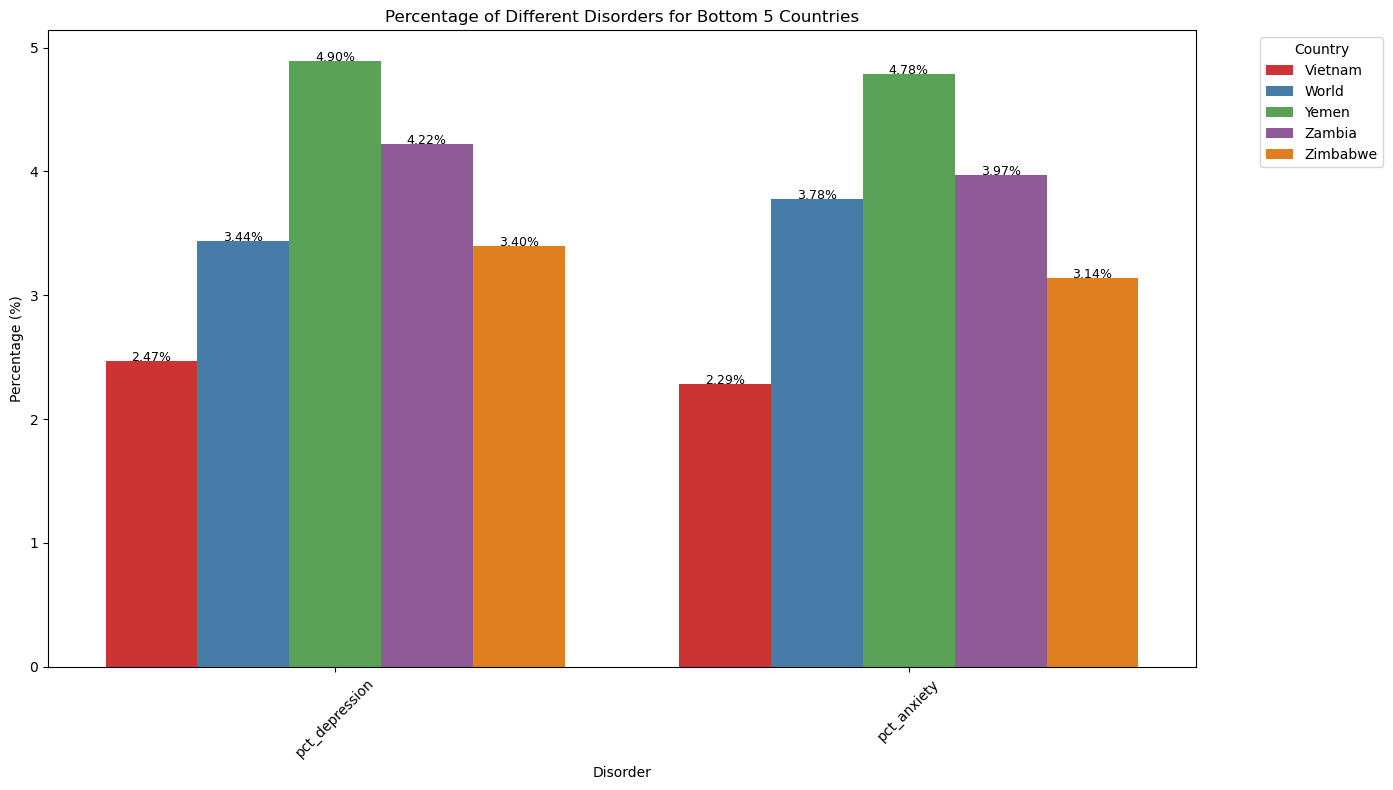

In [83]:
# Sort the dataframe by 'avg_working_hours' and take the top 5 countries
df_bottom5 = mindscape_df_filtered.sort_values(by='avg_working_hours', ascending=False).tail()

# Selecting relevant columns for plotting
df_plot = df_bottom5[['country', 'avg_working_hours', 'pct_depression', 'pct_anxiety']] 

# Melt the dataframe to reshape it for plotting
df_plot_melted = pd.melt(df_plot, id_vars=['country', 'avg_working_hours'], 
                         var_name='Disorder', value_name='Percentage')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plotting
ax = sns.barplot(x='Disorder', y='Percentage', hue='country', data=df_plot_melted, errorbar=None)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=9)

# Setting labels and title
plt.title('Percentage of Different Disorders for Bottom 5 Countries')
plt.xlabel('Disorder')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
df_bottom5 = mindscape_df_filtered.sort_values(by='avg_working_hours', ascending=True).head()

# Selecting relevant columns for plotting
df_plot_bottom = df_bottom5[['country', 'avg_working_hours', 'pct_depression', 'pct_anxiety', 'pct_eating_disorder', 
                             'pct_bipolar', 'pct_schizophrenia', 'alcohol_use_disorder', 'drug_use_disorder', 
                             'amphetamine_use_disorder', 'cocaine_use_disorder', 'cannabis_use_disorder', 'opioid_use_disorder']]

# Melt the dataframe to make it longer format
df_plot_bottom_melted = pd.melt(df_plot_bottom, id_vars=['country', 'avg_working_hours'], 
                                var_name='Disorder', value_name='Percentage')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plotting
sns.barplot(x='Disorder', y='Percentage', hue='country', data=df_plot_bottom_melted, ci=None)

# Annotate bars with average working hours
for index, value in enumerate(df_plot_bottom['avg_working_hours']):
    plt.text(index, 6, f'{value:.2f}', ha='center')

# Setting labels and title
plt.title('Percentage of Disorders and Average Working Hours for Bottom 5 Countries')
plt.xlabel('Disorder')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
mindscape_df_sort = mindscape_df_filtered.sort_values(by='cantril_ladder_score', ascending=False)

In [ ]:
mindscape_df_sort.head(50) 

,country,code,year,population,pct_depression,pct_anxiety,pct_eating_disorder,pct_bipolar,pct_schizophrenia,alcohol_use_disorder,drug_use_disorder,amphetamine_use_disorder,cocaine_use_disorder,cannabis_use_disorder,opioid_use_disorder,avg_working_hours,cantril_ladder_score
1921,Finland,FIN,2019,5521606.0,4.139295,3.993121,0.481808,0.890284,0.264076,2.270792,4482.66650,13195.89600,3.163555e+03,1.462196e+04,1.557712e+04,1590.694538,7.8087
1501,Denmark,DNK,2019,5814422.0,3.482899,4.873904,0.471253,0.940294,0.241382,2.751015,4723.79150,9614.59200,8.063553e+03,1.811576e+04,1.359561e+04,1380.607643,7.6456
5309,Switzerland,CHE,2019,8575280.0,3.705447,6.790610,0.491072,0.941743,0.279983,2.299345,7298.33700,11911.75900,1.057460e+04,5.271809e+04,2.316997e+04,1556.882844,7.5599
2461,Iceland,ISL,2019,360563.0,2.936594,5.103768,0.454107,0.908445,0.278350,2.104176,258.55087,620.25960,4.684179e+02,1.036264e+03,1.064726e+03,1454.494825,7.5045
4079,Norway,NOR,2019,5347896.0,3.238203,6.735841,0.474731,0.828623,0.282721,1.579673,5199.38430,7533.46970,4.252047e+03,1.464133e+04,1.902135e+04,1384.073291,7.4880
3811,Netherlands,NLD,2019,17344874.0,3.534401,6.754801,0.383671,0.787646,0.367969,1.643063,6472.64600,24760.12500,3.049801e+04,7.334726e+04,2.664108e+04,1439.731516,7.4489
5279,Sweden,SWE,2019,10278887.0,4.116486,4.795127,0.514171,0.973931,0.270256,2.176175,6860.47950,16564.42200,7.673002e+03,2.126034e+04,2.322297e+04,1605.276602,7.3535
3841,New Zealand,NZL,2019,4979200.0,3.723864,7.263469,0.603372,1.506402,0.388614,3.104336,2212.31150,14142.52200,5.458857e+03,3.554755e+04,1.018263e+04,1778.984431,7.2996
329,Austria,AUT,2019,8879920.0,3.125201,6.006434,0.562230,0.900435,0.276745,2.517259,5546.86100,12371.29100,1.342424e+04,2.849823e+04,2.783031e+04,1611.374223,7.2942
3151,Luxembourg,LUX,2019,620001.0,3.219307,5.277022,0.568823,0.896122,0.281918,2.281961,474.63043,1136.58790,4.430707e+02,3.022905e+03,2.247499e+03,1505.558542,7.2375


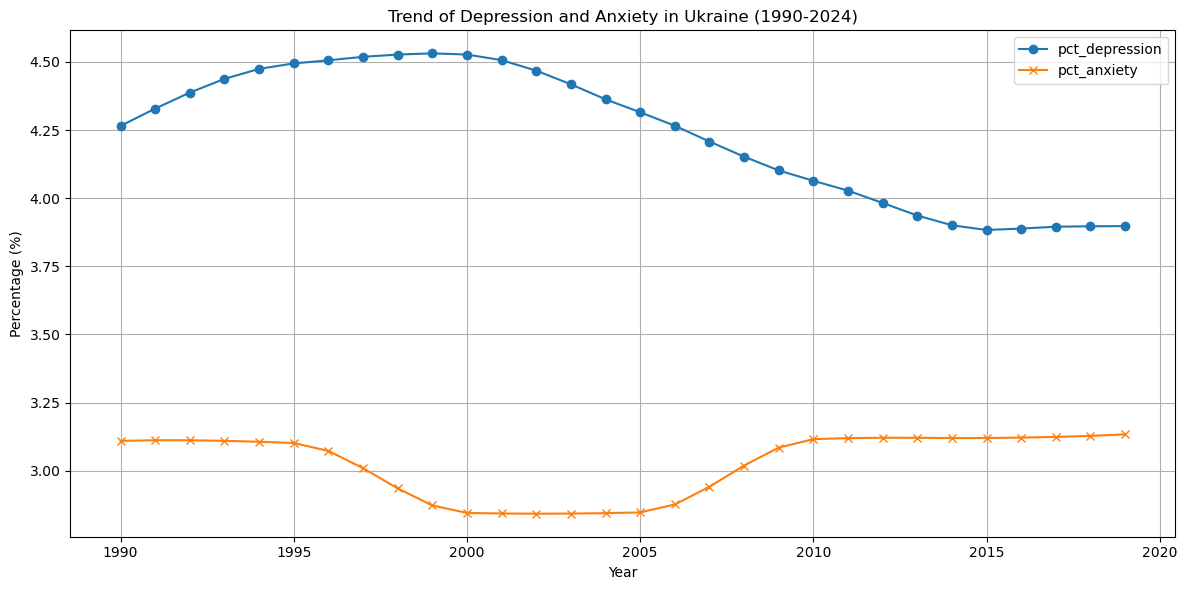

In [ ]:

df_ukraine = mindscape_df[mindscape_df['country'] == 'Ukraine']
plt.figure(figsize=(12, 6))
plt.plot(df_ukraine['year'], df_ukraine['pct_depression'], marker='o', label='pct_depression')
plt.plot(df_ukraine['year'], df_ukraine['pct_anxiety'], marker='x', label='pct_anxiety')

plt.title('Trend of Depression and Anxiety in Ukraine (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

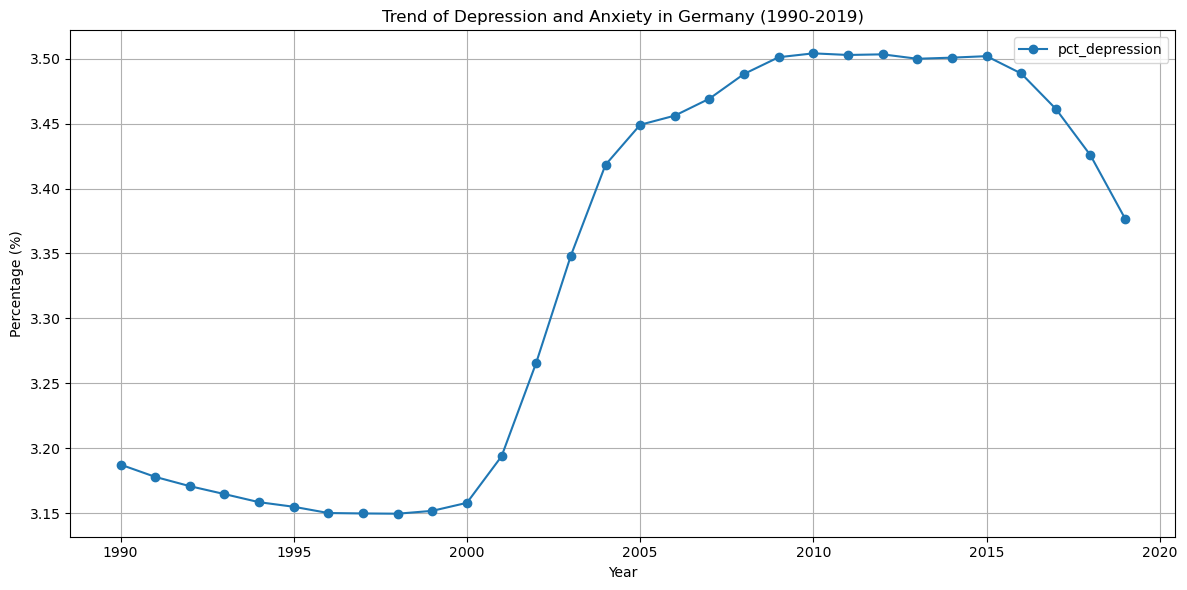

In [ ]:
# Assuming mindscape_df is your dataframe and it contains the necessary columns
# Filter data for Ukraine
df_germany = mindscape_df[mindscape_df['country'] == 'Germany']

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting pct_depression
plt.plot(df_germany['year'], df_germany['pct_depression'], marker='o', label='pct_depression')

# Plotting pct_anxiety
# plt.plot(df_germany['year'], df_germany['pct_anxiety'], marker='x', label='pct_anxiety')

# Set titles and labels
plt.title('Trend of Depression and Anxiety in Germany (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Set legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

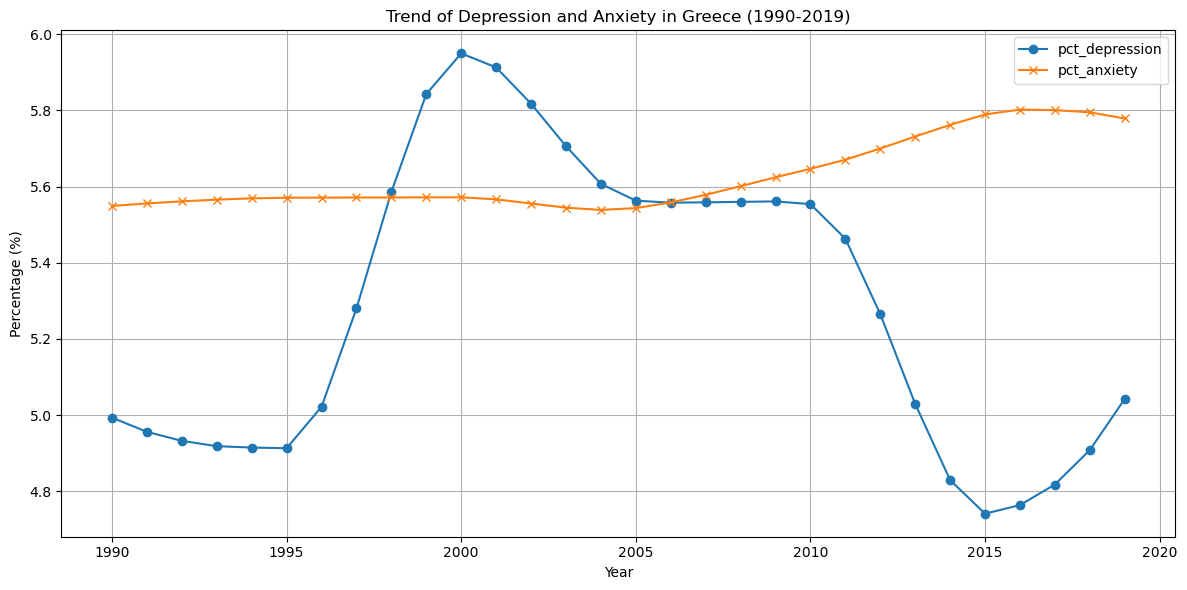

In [ ]:
df_greece = mindscape_df[mindscape_df['country'] == 'Greece']

# Set the figure size
plt.figure(figsize=(12, 6)) 

# Plotting pct_depression
plt.plot(df_greece['year'], df_greece['pct_depression'], marker='o', label='pct_depression')

# Plotting pct_anxiety
plt.plot(df_greece['year'], df_greece['pct_anxiety'], marker='x', label='pct_anxiety')

# Set titles and labels
plt.title('Trend of Depression and Anxiety in Greece (1990-2019)') 
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Set legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/hk/y05z0d6n6_bd590qwk2dcx8m0000gn/T/ipykernel_1655/2319017894.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='pct_depression', hue='country',
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


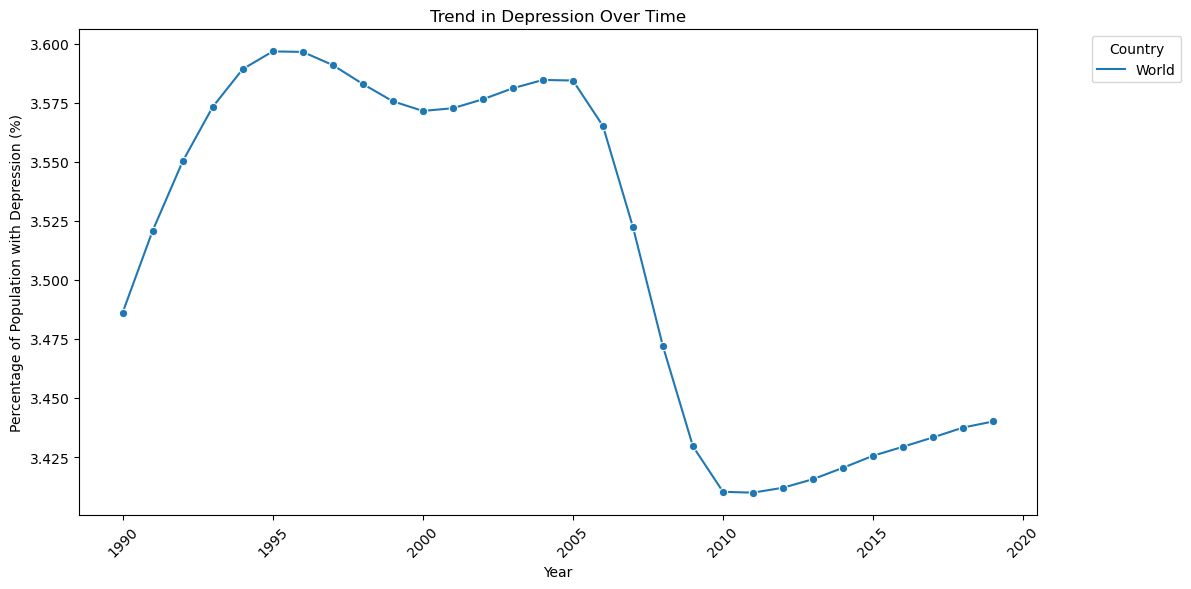

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

mindscape_df_world = mindscape_df[mindscape_df['country'] == 'World'] 
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='pct_depression', hue='country', 
             data=mindscape_df_world, ci=None, marker='o')
plt.title('Trend in Depression Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Population with Depression (%)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 
